In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_data_1 = pd.read_parquet('cicids2018/Botnet-Friday-02-03-2018_TrafficForML_CICFlowMeter.parquet')
df_data_2 = pd.read_parquet('cicids2018/Bruteforce-Wednesday-14-02-2018_TrafficForML_CICFlowMeter.parquet')
df_data_3 = pd.read_parquet('cicids2018/DDoS2-Wednesday-21-02-2018_TrafficForML_CICFlowMeter.parquet')
df_data_4 = pd.read_parquet('cicids2018/DoS2-Friday-16-02-2018_TrafficForML_CICFlowMeter.parquet')
df_data_5 = pd.read_parquet('cicids2018/Infil2-Thursday-01-03-2018_TrafficForML_CICFlowMeter.parquet')
df_data_7 = pd.read_parquet('cicids2018/Web2-Friday-23-02-2018_TrafficForML_CICFlowMeter.parquet')

In [5]:
data = pd.concat([df_data_1, df_data_2, df_data_3, df_data_4, 
                    df_data_5, df_data_7], axis=0, ignore_index=True)

In [6]:
null_counts = data.isnull().sum()
# Print the number of null values
print(f"{null_counts.sum()} null entries have been found in the dataset\n")
# Drop null values
data.dropna(inplace=True)          # or df_data = df_data.dropna()

# Find and handle duplicates
duplicate_count = data.duplicated().sum()
# Print the number of duplicate entries
print(f"{duplicate_count} duplicate entries have been found in the dataset\n")
# Remove duplicates
data.drop_duplicates(inplace=True)  # or df_data = df_data.drop_duplicates()
# Display relative message
print(f"All duplicates have been removed\n")

# Reset the indexes
data.reset_index(drop=True, inplace=True)

# Inspect the dataset for categorical columns
print("Categorical columns:",data.select_dtypes(include=['object']).columns.tolist(),'\n')

# Print the first 5 lines
data.head()

0 null entries have been found in the dataset

72648 duplicate entries have been found in the dataset

All duplicates have been removed

Categorical columns: ['Label'] 



,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,141385,9,7,553,3773.0,202,0,61.444443,87.534439,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,6,281,2,1,38,0.0,38,0,19.000000,26.870058,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,6,279824,11,15,1086,10527.0,385,0,98.727272,129.392502,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,6,132,2,0,0,0.0,0,0,0.000000,0.000000,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,6,274016,9,13,1285,6141.0,517,0,142.777771,183.887726,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [7]:
data.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Total Backward Packets', 'Fwd Packets Length Total',
       'Bwd Packets Length Total', 'Fwd Packet Length Max',
       'Fwd Packet Length Min', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Min', 'Bwd Packet Length Mean',
       'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s',
       'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min',
       'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max',
       'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std',
       'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
       'SYN Flag Count', 'RST Fla

In [8]:
drop_columns = [ # this list includes all spellings across CIC NIDS datasets
    "Flow ID",    
    'Fwd Header Length.1',
    "Source IP", "Src IP",
    "Source Port", "Src Port",
    "Destination IP", "Dst IP",
    "Destination Port", "Dst Port",
    "Timestamp",
]
data.drop(columns=drop_columns, inplace=True, errors='ignore')  

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3550129 entries, 0 to 3550128
Data columns (total 78 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Protocol                  int8   
 1   Flow Duration             int64  
 2   Total Fwd Packets         int32  
 3   Total Backward Packets    int32  
 4   Fwd Packets Length Total  int32  
 5   Bwd Packets Length Total  float64
 6   Fwd Packet Length Max     int32  
 7   Fwd Packet Length Min     int16  
 8   Fwd Packet Length Mean    float32
 9   Fwd Packet Length Std     float32
 10  Bwd Packet Length Max     int32  
 11  Bwd Packet Length Min     int16  
 12  Bwd Packet Length Mean    float32
 13  Bwd Packet Length Std     float32
 14  Flow Bytes/s              float64
 15  Flow Packets/s            float64
 16  Flow IAT Mean             float32
 17  Flow IAT Std              float32
 18  Flow IAT Max              float64
 19  Flow IAT Min              float64
 20  Fwd IAT Total           

In [10]:
data['Label'].value_counts()

Benign                      2903073
DDOS attack-HOIC             198861
DoS attacks-Hulk             145199
Bot                          144535
SSH-Bruteforce                94048
Infilteration                 62034
DDOS attack-LOIC-UDP           1730
Brute Force -Web                340
Brute Force -XSS                150
DoS attacks-SlowHTTPTest         55
FTP-BruteForce                   53
SQL Injection                    51
Name: Label, dtype: int64

In [11]:
def change_label(df):
  df['Label'].replace(['DDOS attack-HOIC','DoS attacks-Hulk','DDOS attack-LOIC-UDP','DoS attacks-SlowHTTPTest'],'Dos',inplace=True)
  df['Label'].replace(['FTP-Patator','SSH-Bruteforce','Infilteration','Bot'],'Bot',inplace=True)      
  df['Label'].replace(['Brute Force -Web','Brute Force -XSS','FTP-BruteForce','SSH-Bruteforce'],'BruteForce',inplace=True)

In [12]:
change_label(data)

In [13]:
# distribution of attack classes
data['Label'].value_counts()

Benign           2903073
Dos               345845
Bot               300617
BruteForce           543
SQL Injection         51
Name: Label, dtype: int64

In [14]:
#print(data.info())
data = pd.concat([
    data[data.Label == 'Benign'].sample(n=10_000),
    data[data.Label == 'Dos'].sample(n=10_000),
    data[data.Label == 'Bot'].sample(n=10_000),
    data[data.Label == 'BruteForce'],
    data[data.Label == 'SQL Injection']
])
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30594 entries, 1641306 to 2774058
Data columns (total 78 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Protocol                  30594 non-null  int8   
 1   Flow Duration             30594 non-null  int64  
 2   Total Fwd Packets         30594 non-null  int32  
 3   Total Backward Packets    30594 non-null  int32  
 4   Fwd Packets Length Total  30594 non-null  int32  
 5   Bwd Packets Length Total  30594 non-null  float64
 6   Fwd Packet Length Max     30594 non-null  int32  
 7   Fwd Packet Length Min     30594 non-null  int16  
 8   Fwd Packet Length Mean    30594 non-null  float32
 9   Fwd Packet Length Std     30594 non-null  float32
 10  Bwd Packet Length Max     30594 non-null  int32  
 11  Bwd Packet Length Min     30594 non-null  int16  
 12  Bwd Packet Length Mean    30594 non-null  float32
 13  Bwd Packet Length Std     30594 non-null  float32
 14

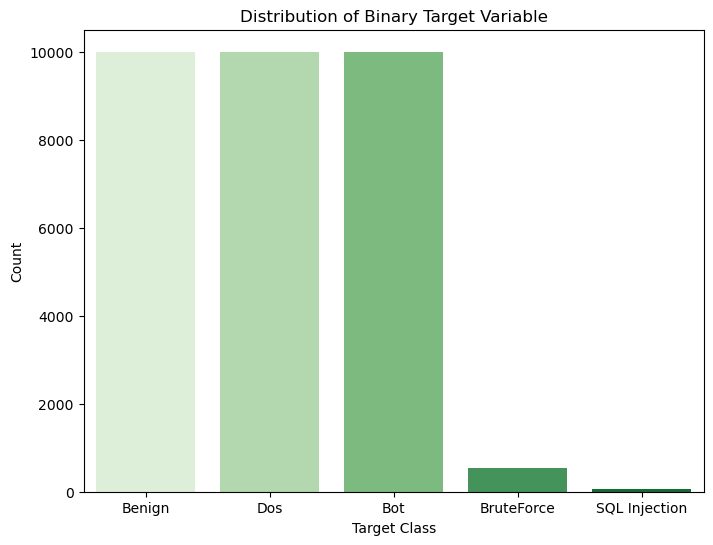

In [15]:
# Plotting the distribution of the binary target variable y
plt.figure(figsize=(8, 6))
sns.countplot(x=data['Label'], palette='Greens')
plt.title('Distribution of Binary Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

In [16]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
data['Label']= label_encoder.fit_transform(data['Label'])

data['Label'].unique()

array([0, 3, 1, 2, 4])

In [17]:
X = data.drop(["Label"],axis =1)
y = data["Label"]

# FS

In [18]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

In [19]:
selector = SelectPercentile(mutual_info_classif, percentile=25)
X_reduced = selector.fit_transform(X, y)
#X_reduced.shape

In [20]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['Fwd Packets Length Total',
 'Bwd Packets Length Total',
 'Fwd Packet Length Max',
 'Fwd Packet Length Mean',
 'Fwd Packet Length Std',
 'Bwd Packet Length Max',
 'Bwd Packet Length Mean',
 'Bwd Packet Length Std',
 'Fwd IAT Total',
 'Packet Length Max',
 'Packet Length Mean',
 'Packet Length Std',
 'Packet Length Variance',
 'Avg Packet Size',
 'Avg Fwd Segment Size',
 'Avg Bwd Segment Size',
 'Subflow Fwd Bytes',
 'Subflow Bwd Bytes',
 'Init Fwd Win Bytes']

In [21]:
len(selected_columns)

19

In [22]:
df = data[['Fwd Packets Length Total',
             'Bwd Packets Length Total',
             'Fwd Packet Length Max',
             'Fwd Packet Length Mean',
             'Fwd Packet Length Std',
             'Bwd Packet Length Max',
             'Bwd Packet Length Mean',
             'Bwd Packet Length Std',
             'Fwd IAT Total',
             'Packet Length Max',
             'Packet Length Mean',
             'Packet Length Std',
             'Packet Length Variance',
             'Avg Packet Size',
             'Avg Fwd Segment Size',
             'Avg Bwd Segment Size',
             'Subflow Fwd Bytes',
             'Subflow Bwd Bytes',
             'Init Fwd Win Bytes','Label']]

In [23]:
df.to_csv('cicids18_processed.csv')

In [24]:
df = pd.read_csv('cicids18_processed.csv')

In [25]:
del df['Unnamed: 0']

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30594 entries, 0 to 30593
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Fwd Packets Length Total  30594 non-null  int64  
 1   Bwd Packets Length Total  30594 non-null  float64
 2   Fwd Packet Length Max     30594 non-null  int64  
 3   Fwd Packet Length Mean    30594 non-null  float64
 4   Fwd Packet Length Std     30594 non-null  float64
 5   Bwd Packet Length Max     30594 non-null  int64  
 6   Bwd Packet Length Mean    30594 non-null  float64
 7   Bwd Packet Length Std     30594 non-null  float64
 8   Fwd IAT Total             30594 non-null  float64
 9   Packet Length Max         30594 non-null  int64  
 10  Packet Length Mean        30594 non-null  float64
 11  Packet Length Std         30594 non-null  float64
 12  Packet Length Variance    30594 non-null  float64
 13  Avg Packet Size           30594 non-null  float64
 14  Avg Fw

In [27]:
df.columns

Index(['Fwd Packets Length Total', 'Bwd Packets Length Total',
       'Fwd Packet Length Max', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Fwd IAT Total',
       'Packet Length Max', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'Avg Packet Size', 'Avg Fwd Segment Size',
       'Avg Bwd Segment Size', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes',
       'Init Fwd Win Bytes', 'Label'],
      dtype='object')

In [28]:
X = df[['Fwd Packets Length Total', 'Bwd Packets Length Total',
       'Fwd Packet Length Max', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Fwd IAT Total',
       'Packet Length Max', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'Avg Packet Size', 'Avg Fwd Segment Size',
       'Avg Bwd Segment Size', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes',
       'Init Fwd Win Bytes']]
y = df["Label"]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((24475, 19), (24475,), (6119, 19), (6119,))

In [30]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [31]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred    = knn.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')

In [33]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1)

# Softmax LR

In [34]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train, y_train)

y_pred    = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')

In [35]:
 storeResults('Softmax LR',lr_acc,lr_prec,lr_rec,lr_f1)

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy',max_features='log2',max_depth=20,n_estimators=600,min_samples_leaf=2)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [37]:
storeResults('RandomForest',rf_acc,rf_prec,rf_rec,rf_f1)

# HAT/Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',max_features='log2',max_depth=25,min_samples_leaf=2,min_samples_split=5)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [39]:
 storeResults('HAT/DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

# Majority Voting

In [40]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators=[('KNN', knn), ('LR', lr), ('RF', rf), ('DT', dt)], voting='hard')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [41]:
storeResults('Majority Voting',vot_acc,vot_prec,vot_rec,vot_f1)

# Stacking Classifier

In [42]:
from sklearn.ensemble import StackingClassifier, BaggingClassifier

estimators = [('rf', rf),('dt', dt)]

clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)

eclf1 = StackingClassifier(estimators=estimators, final_estimator = clf1)

eclf1.fit(X_train, y_train)

y_pred = eclf1.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')

In [43]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

# Comparison

In [44]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [45]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,KNN,0.903,0.903,0.903,0.903
1,Softmax LR,0.470,0.650,0.470,0.529
2,RandomForest,0.940,0.944,0.940,0.941
3,HAT/DecisionTree,0.930,0.931,0.930,0.930
4,Majority Voting,0.929,0.935,0.929,0.929
5,Stacking Classifier,0.948,0.950,0.948,0.948


# Modelling

In [46]:
import joblib
filename = 'models/cicids2018/model_org.sav'
joblib.dump(eclf1, filename)

['models/cicids2018/model_org.sav']

# Graph

In [48]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

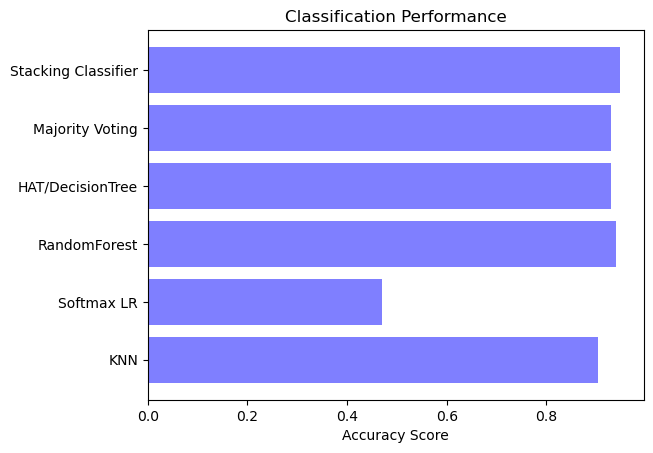

In [49]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

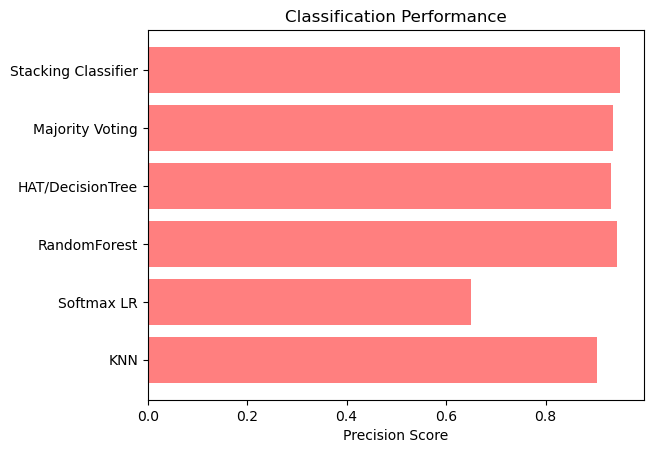

In [50]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

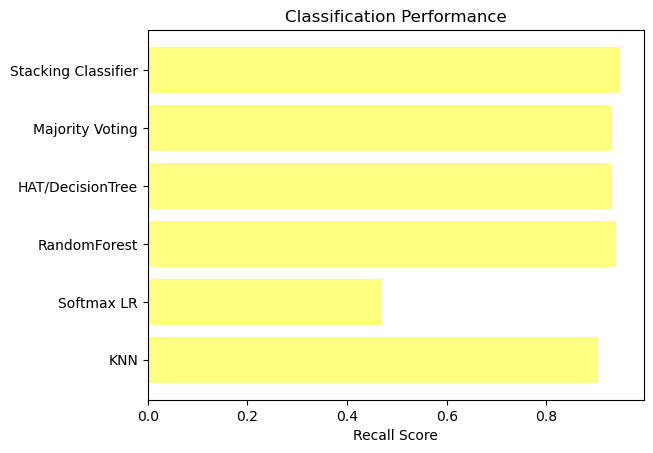

In [51]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

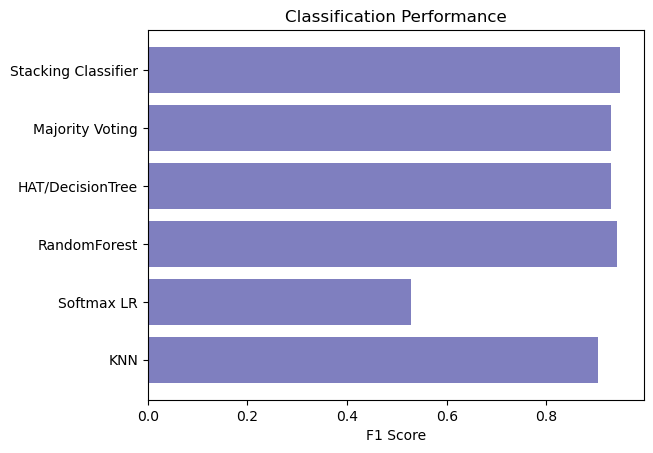

In [52]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Random UnderSampling

In [53]:
X = df[['Fwd Packets Length Total', 'Bwd Packets Length Total',
       'Fwd Packet Length Max', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Fwd IAT Total',
       'Packet Length Max', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'Avg Packet Size', 'Avg Fwd Segment Size',
       'Avg Bwd Segment Size', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes',
       'Init Fwd Win Bytes']]
y = df["Label"]

In [54]:
from imblearn.under_sampling import RandomUnderSampler

In [55]:
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((204, 19), (204,), (51, 19), (51,))

In [57]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred    = knn.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')

In [59]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1)

# Softmax LR

In [60]:
from sklearn.linear_model import LogisticRegression
lr =  LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train, y_train)

y_pred    = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')

In [61]:
 storeResults('Softmax LR',lr_acc,lr_prec,lr_rec,lr_f1)

# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy',max_features='log2',max_depth=20,n_estimators=600,min_samples_leaf=2)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [63]:
storeResults('RandomForest',rf_acc,rf_prec,rf_rec,rf_f1)

# HAT/Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',max_features='log2',max_depth=25,min_samples_leaf=2,min_samples_split=5)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [65]:
storeResults('HAT/DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

# Majority Voting

In [66]:
from sklearn.ensemble import VotingClassifier
clf = VotingClassifier(estimators=[('KNN', knn), ('LR', lr), ('RF', rf), ('DT', dt)], voting='hard')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [67]:
storeResults('Majority Voting',vot_acc,vot_prec,vot_rec,vot_f1)

# Stacking Classifier

In [68]:
from sklearn.ensemble import StackingClassifier, BaggingClassifier

estimators = [('rf', rf),('dt', dt)]

clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)

eclf1 = StackingClassifier(estimators=estimators, final_estimator = clf1)

eclf1.fit(X_train, y_train)

y_pred = eclf1.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')

In [69]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

# Comparison

In [70]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [71]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,KNN,0.784,0.804,0.784,0.783
1,Softmax LR,0.392,0.653,0.392,0.434
2,RandomForest,0.922,0.938,0.922,0.921
3,HAT/DecisionTree,0.647,0.850,0.647,0.664
4,Majority Voting,0.863,0.901,0.863,0.862
5,Stacking Classifier,0.961,0.964,0.961,0.960


In [72]:
import joblib
filename = 'models/cicids2018/model_und.sav'
joblib.dump(eclf1, filename)

['models/cicids2018/model_und.sav']

# Graph

In [74]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

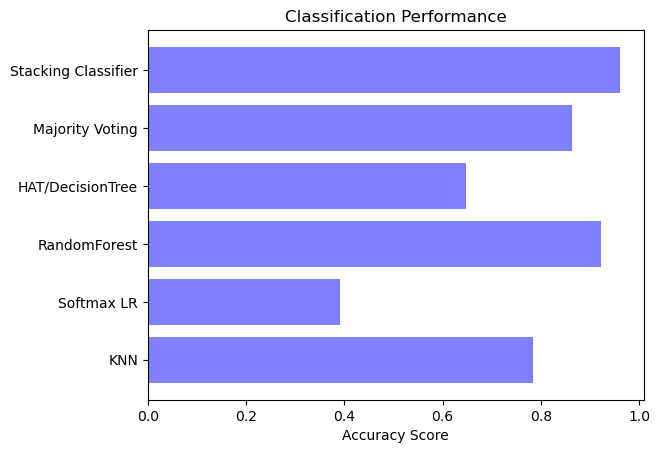

In [75]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

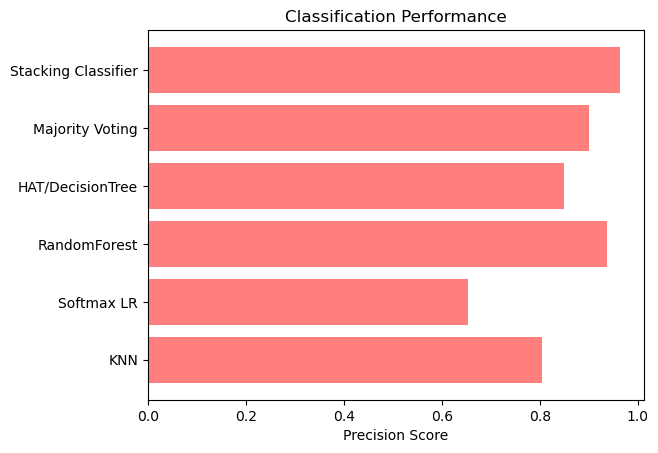

In [76]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

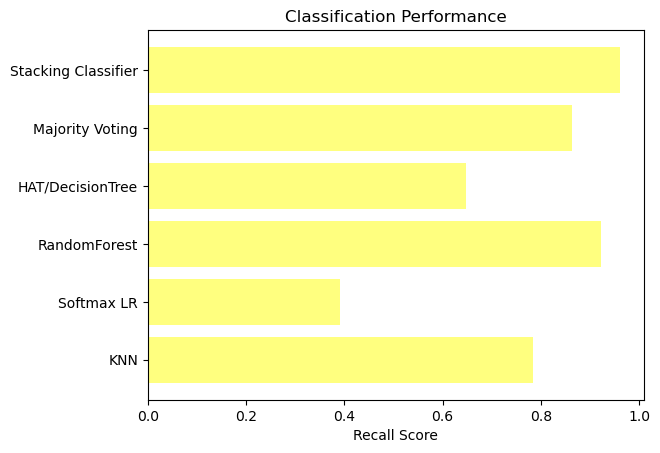

In [77]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

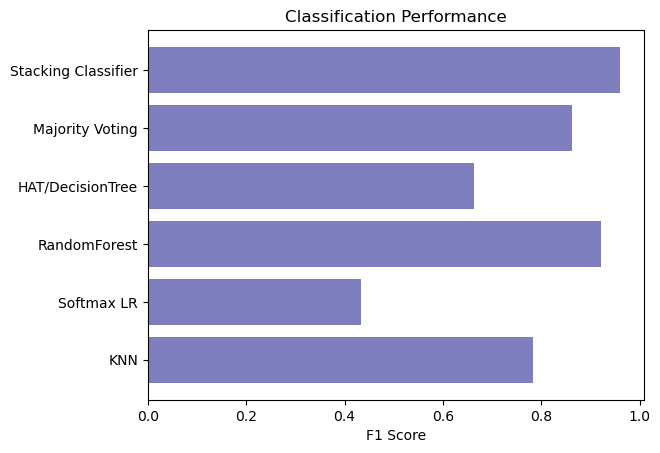

In [78]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Random OverSampling

In [79]:
X = df[['Fwd Packets Length Total', 'Bwd Packets Length Total',
       'Fwd Packet Length Max', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Fwd IAT Total',
       'Packet Length Max', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'Avg Packet Size', 'Avg Fwd Segment Size',
       'Avg Bwd Segment Size', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes',
       'Init Fwd Win Bytes']]
y = df["Label"]

In [80]:
from imblearn.over_sampling import RandomOverSampler

In [81]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((40000, 19), (40000,), (10000, 19), (10000,))

In [83]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# KNN

In [84]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred    = knn.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')

In [85]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1)

# Softmax LR

In [86]:
lr =  LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train, y_train)

y_pred    = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')

In [87]:
 storeResults('Softmax LR',lr_acc,lr_prec,lr_rec,lr_f1)

# Random Forest

In [88]:
rf = RandomForestClassifier(criterion='entropy',max_features='log2',max_depth=20,n_estimators=600,min_samples_leaf=2)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [89]:
storeResults('RandomForest',rf_acc,rf_prec,rf_rec,rf_f1)

# HAT/Decision Tree

In [90]:
dt = DecisionTreeClassifier(criterion='entropy',max_features='log2',max_depth=25,min_samples_leaf=2,min_samples_split=5)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [91]:
storeResults('HAT/DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

# Majority Voting

In [92]:
clf = VotingClassifier(estimators=[('KNN', knn), ('LR', lr), ('RF', rf), ('DT', dt)], voting='hard')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [93]:
storeResults('Majority Voting',vot_acc,vot_prec,vot_rec,vot_f1)

# Stacking Classifier

In [94]:
estimators = [('rf', rf),('dt', dt)]

clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)

eclf1 = StackingClassifier(estimators=estimators, final_estimator = clf1)

eclf1.fit(X_train, y_train)

y_pred = eclf1.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')

In [95]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

# Comparison

In [96]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [97]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,KNN,0.939,0.939,0.939,0.939
1,Softmax LR,0.423,0.672,0.423,0.471
2,RandomForest,0.959,0.962,0.959,0.959
3,HAT/DecisionTree,0.867,0.896,0.867,0.867
4,Majority Voting,0.954,0.957,0.954,0.954
5,Stacking Classifier,0.953,0.954,0.953,0.953


# Graph

In [98]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

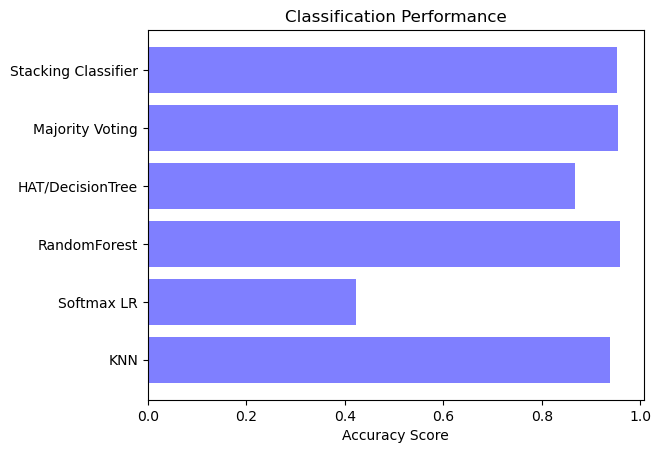

In [99]:
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

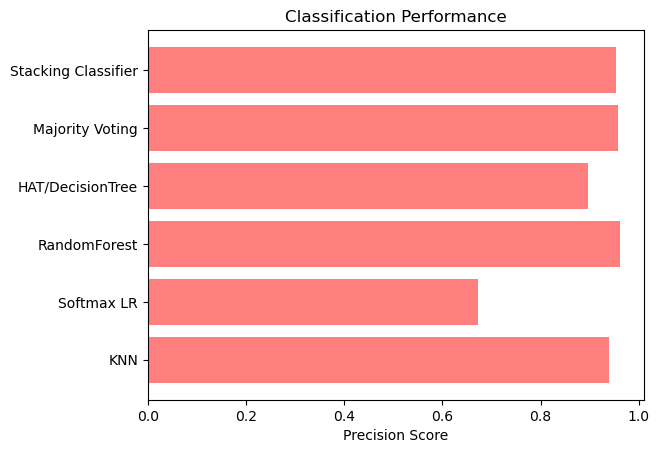

In [100]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

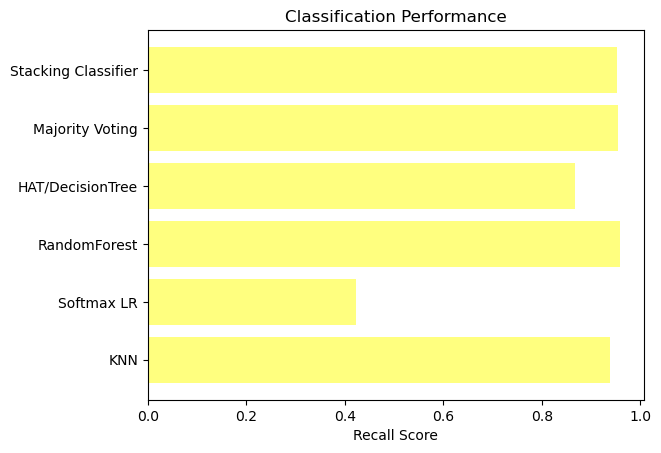

In [101]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

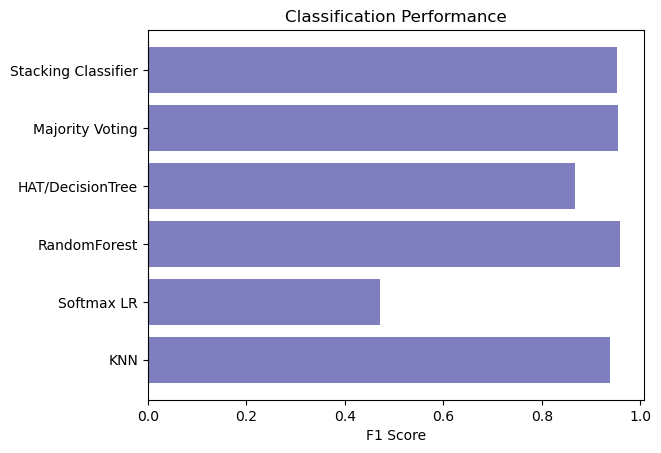

In [102]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# Random Under/Over Sampler (Combine)

In [103]:
X = df[['Fwd Packets Length Total', 'Bwd Packets Length Total',
       'Fwd Packet Length Max', 'Fwd Packet Length Mean',
       'Fwd Packet Length Std', 'Bwd Packet Length Max',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Fwd IAT Total',
       'Packet Length Max', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'Avg Packet Size', 'Avg Fwd Segment Size',
       'Avg Bwd Segment Size', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes',
       'Init Fwd Win Bytes']]
y = df["Label"]

In [104]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)

In [105]:
X_resampled, y_resampled = smote_enn.fit_resample(X, y)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((34269, 19), (34269,), (8568, 19), (8568,))

In [107]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []


#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

# KNN

In [108]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred    = knn.predict(X_test)

knn_acc = accuracy_score(y_pred, y_test)
knn_prec = precision_score(y_pred, y_test,average='weighted')
knn_rec = recall_score(y_pred, y_test,average='weighted')
knn_f1 = f1_score(y_pred, y_test,average='weighted')

In [109]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1)

# Softmax LR

In [110]:
lr =  LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lr.fit(X_train, y_train)

y_pred    = lr.predict(X_test)

lr_acc = accuracy_score(y_pred, y_test)
lr_prec = precision_score(y_pred, y_test,average='weighted')
lr_rec = recall_score(y_pred, y_test,average='weighted')
lr_f1 = f1_score(y_pred, y_test,average='weighted')

In [111]:
 storeResults('Softmax LR',lr_acc,lr_prec,lr_rec,lr_f1)

# Random Forest

In [112]:
rf = RandomForestClassifier(criterion='entropy',max_features='log2',max_depth=20,n_estimators=600,min_samples_leaf=2)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [113]:
storeResults('RandomForest',rf_acc,rf_prec,rf_rec,rf_f1)

# HAT/Decision Tree

In [114]:
dt = DecisionTreeClassifier(criterion='entropy',max_features='log2',max_depth=25,min_samples_leaf=2,min_samples_split=5)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

dt_acc = accuracy_score(y_pred, y_test)
dt_prec = precision_score(y_pred, y_test,average='weighted')
dt_rec = recall_score(y_pred, y_test,average='weighted')
dt_f1 = f1_score(y_pred, y_test,average='weighted')

In [115]:
storeResults('HAT/DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1)

# Majority Voting

In [116]:
clf = VotingClassifier(estimators=[('KNN', knn), ('LR', lr), ('RF', rf), ('DT', dt)], voting='hard')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [117]:
storeResults('Majority Voting',vot_acc,vot_prec,vot_rec,vot_f1)

# Stacking Classifier

In [118]:
estimators = [('rf', rf),('dt', dt)]

clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=100, random_state=0)

eclf1 = StackingClassifier(estimators=estimators, final_estimator = clf1)

eclf1.fit(X_train, y_train)

y_pred = eclf1.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')

In [119]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

# Comparison

In [120]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score 
                      }) 

In [121]:
result

,ML Model,Accuracy,Precision,Recall,F1_score
0,KNN,0.995,0.995,0.995,0.995
1,Softmax LR,0.429,0.568,0.429,0.453
2,RandomForest,0.997,0.997,0.997,0.997
3,HAT/DecisionTree,0.996,0.996,0.996,0.996
4,Majority Voting,0.996,0.996,0.996,0.996
5,Stacking Classifier,0.996,0.996,0.996,0.996


# Modelling

In [122]:
import joblib
filename = 'models/cicids2018/model_com.sav'
joblib.dump(eclf1, filename)

['models/cicids2018/model_com.sav']

# Graph

In [124]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

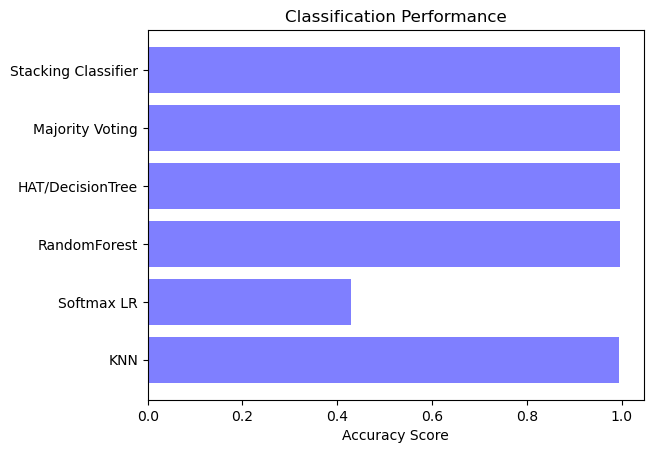

In [125]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

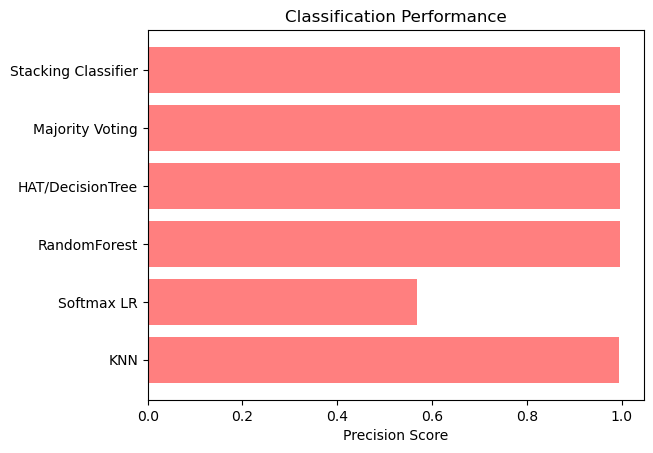

In [126]:
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

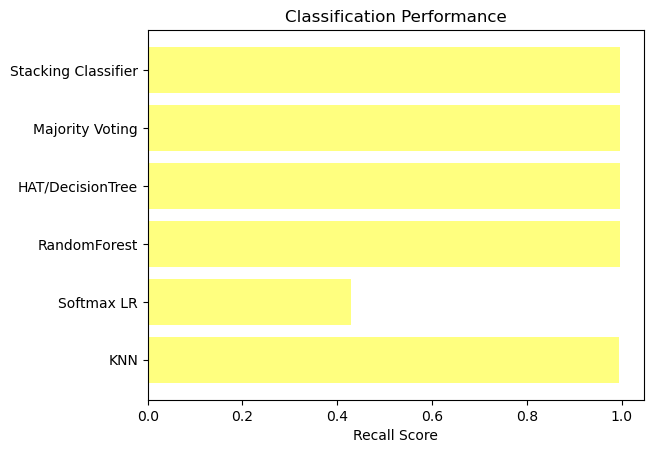

In [127]:
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

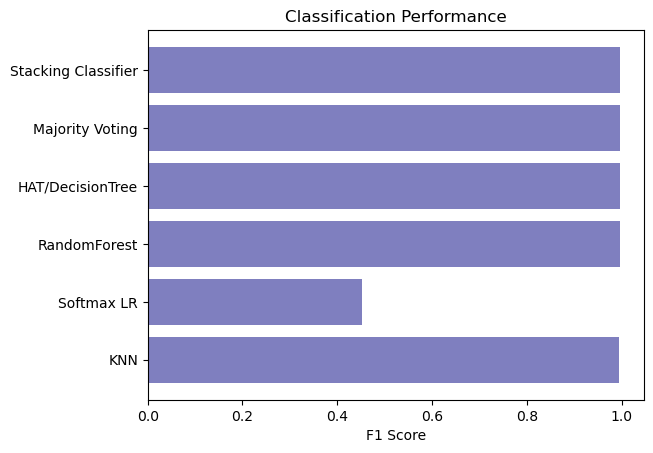

In [128]:
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()